In [1]:
import pandas as pd
import numpy as np

clientes=pd.read_csv("clientes.csv")

In [2]:
clientes.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
clientes["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [5]:
clientes["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [6]:
dup=clientes.duplicated()
duplicates=dup.sum()
duplicates

0

In [7]:
clientes.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### ** Por qué hay clientes sin carné? **


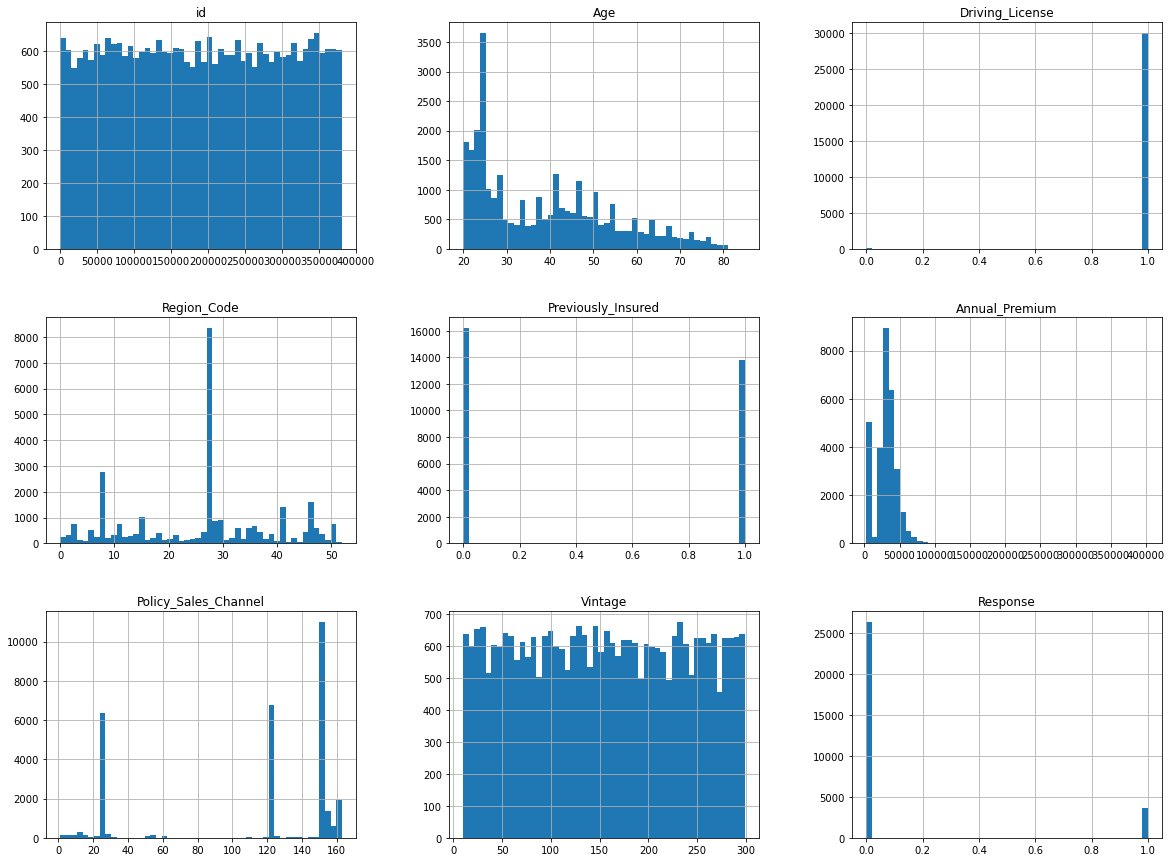

In [8]:
import matplotlib.pyplot as plt

sample=clientes.sample(n=30000)

sample.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
sample_si=sample[sample["Response"]==1]

In [10]:
sample_si.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
173671,173672,Female,44,1,28.0,0,1-2 Year,Yes,30467.0,124.0,96,1
102526,102527,Male,53,1,35.0,0,1-2 Year,Yes,32504.0,26.0,119,1
184176,184177,Female,25,1,36.0,0,< 1 Year,Yes,28725.0,152.0,197,1
316884,316885,Male,72,1,28.0,0,1-2 Year,Yes,31094.0,26.0,139,1
74741,74742,Male,56,1,28.0,0,1-2 Year,Yes,39128.0,26.0,230,1


In [11]:
sample_si.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,3619.000000,3619.00000,3619.000000,3619.000000,3619.000000,3619.000000,3619.000000,3619.000000,3619.0
mean,191932.658193,43.10362,0.999171,26.768168,0.001934,31609.992263,92.099475,154.666759,1.0
std,110978.744787,12.18058,0.028784,11.831488,0.043943,18203.964368,55.602500,82.793996,0.0
min,16.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,1.0
25%,93523.000000,34.00000,1.000000,22.000000,0.000000,25007.000000,26.000000,83.000000,1.0
50%,191879.000000,43.00000,1.000000,28.000000,0.000000,32827.000000,124.000000,156.000000,1.0
75%,288151.000000,50.00000,1.000000,30.000000,0.000000,40784.500000,124.000000,224.500000,1.0
max,380963.000000,80.00000,1.000000,51.000000,1.000000,340439.000000,163.000000,299.000000,1.0


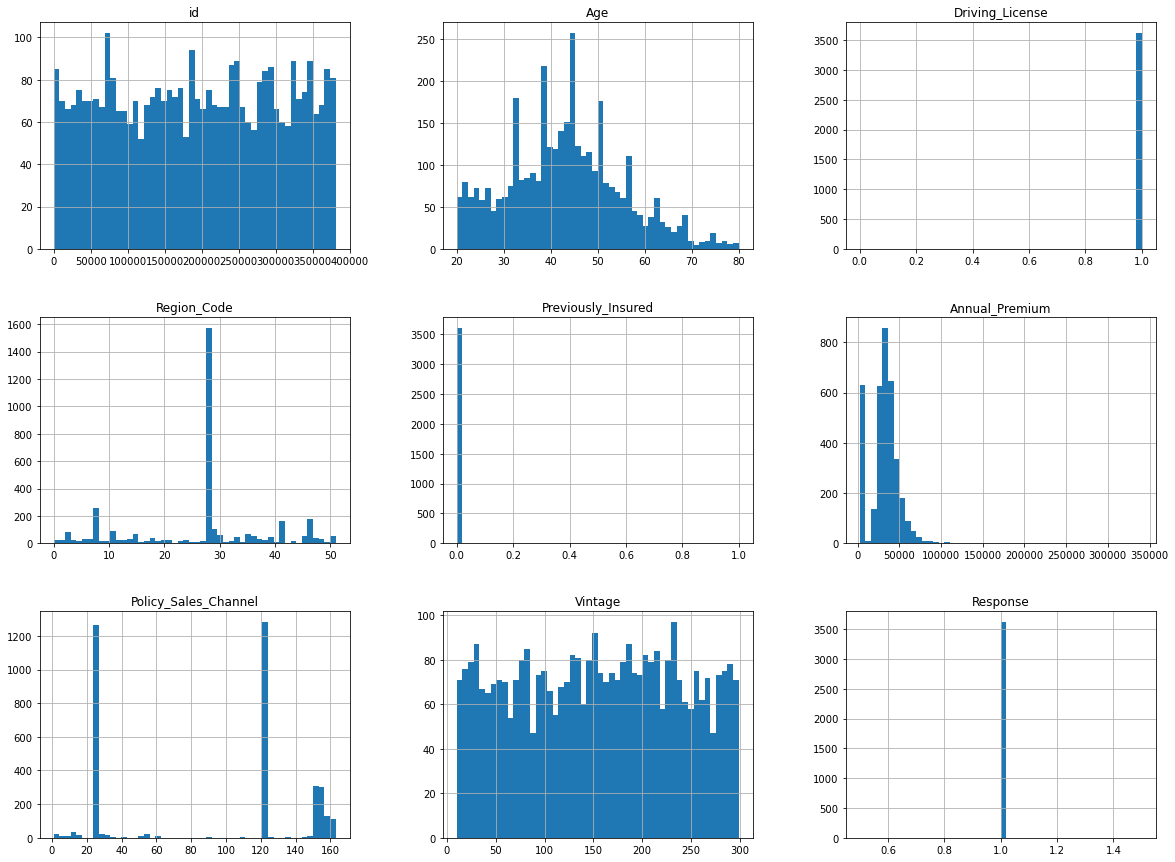

In [12]:
sample_si.hist(bins=50, figsize=(20,15))
plt.show()

### SI COGEMOS SOLO LOS QUE HAN DICHO QUE SI, VEMOS QUE LA EDAD SIGUE UNA DISTRIBUCIÓN NORMAL CENTRADA EN LOS 45 AÑOS, LA REGIÓN 28 DESTACA, TODOS SON CLIENTES NUEVOS Y HAY 2 CANALES DE COMUNICACIÓN SUPERIORES A LOS DEMÁS

## COMO QUEREMOS QUE SEAN CLIENTES YA EXISTENTES, PODRÍAMOS OBVIAR EL CAMPO "PREVIOUSLY_INSURED" Y VER QUÉ OTRAS CARACTERÍSTICAS HACEN QUE HAYA INTERÉS

# CREAMOS EL TEST SET

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(clientes, test_size=0.2, random_state=42) #Utilizamos el método de sklearn para hacer el random split del dataset
print(len(train_set), "train +", len(test_set), "test")

304887 train + 76222 test


In [14]:
clientes=train_set.copy()

In [15]:
#Creamos nuestro dataset de etiquetas y el dataset de parámetros
clientes_labels=clientes['Response'].copy()
clientes = clientes.drop(columns=['Response', 'id'])

### Tenemos que hacer OneHotEncoding en todas aquellas columnas que se corresponden a categorías y que no tengan 1-0, Gender, Driving_Licence, RegionCode, Vehicle_Age, Vehicle_Damage, Policy_Sales_Channel

In [16]:
# Lista de columnas a transformar
#columns_to_encode = ['Gender', 'Region_Code', 'Driving_License', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

# Aplicar LabelEncoder a las columnas seleccionadas
#label_encoders = {}
#for col in columns_to_encode:
#    encoder = LabelEncoder()
#    clientes[col] = encoder.fit_transform(clientes[col])
#    label_encoders[col] = encoder  # Guardar el LabelEncoder para cada columna

In [17]:
#onehot_encoder = OneHotEncoder(sparse=False)

# Aplicar OneHotEncoder solo a las columnas que han sido LabelEncoded
#encoded_columns = onehot_encoder.fit_transform(clientes[columns_to_encode])

# Crear un DataFrame con las columnas codificadas
#clientes_cat_1hot = pd.DataFrame(encoded_columns, columns=onehot_encoder.get_feature_names_out(columns_to_encode))

# Verifica que las dimensiones sean correctas
#print(f"Shape of original dataframe: {clientes.shape}")
#print(f"Shape of one-hot encoded dataframe: {clientes_cat_1hot.shape}")


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

In [19]:
# Transformador personalizado para transformar las variables numéricas que deberían ser objects, para su posterior encoding
class ChangeDtypeToObject(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns  # Columnas que deseas convertir a object

    def fit(self, X, y=None):
        # No necesitamos hacer nada en el fit para este caso
        return self

    def transform(self, X):
        # Copiar el DataFrame para evitar cambios no deseados en los datos originales
        X_transformed = X.copy()
        # Cambiar el tipo de dato de las columnas especificadas a 'object'
        for col in self.columns:
            X_transformed[col] = X_transformed[col].astype('object')
        return X_transformed

In [20]:
# Transformador personalizado para eliminar variables colineales porque hemos visto que aparecen demasiadas variables al final del pipeline
class RemoveCollinearFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9):
        self.threshold = threshold
        self.to_drop = None

    def fit(self, X, y=None):
        # Convertir a denso si es un array disperso
        if isinstance(X, csr_matrix):
            X = X.toarray()
        corr_matrix = pd.DataFrame(X).corr().abs()  # Matriz de correlación
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        self.to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
        return self

    def transform(self, X):
        if isinstance(X, csr_matrix):
            X = X.toarray()
        return pd.DataFrame(X).drop(columns=self.to_drop)

In [21]:
#Creamos los pipelines de las transformaciones por separado

# Especificar las columnas
columns_to_convert = ['Region_Code', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']  # Columnas categóricas no binarias
numeric_columns = ['Age', 'Annual_Premium']        # Columnas numéricas
binary_columns = ['Previously_Insured', 'Driving_License']  # Columnas binarias
categorical_columns = ['Gender', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']  # Columnas categóricas no binarias (ya excluí 'Driving_License')

# Pipeline para procesar atributos numéricos
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes
    ('scaler', StandardScaler())  # Estandarizar las variables numéricas
])

# Pipeline para procesar atributos categóricos no binarios
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Codificar las variables categóricas
])

# Pipeline para procesar atributos categóricos binarios (sin transformación)
binary_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Imputar valores faltantes
])

# Pipeline para seleccionar y procesar las columnas numéricas, categóricas y binarias
processing_pipeline = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_columns),        # Procesar columnas numéricas
    ('cat', categorical_pipeline, categorical_columns),# Procesar columnas categóricas no binarias
    ('bin', binary_pipeline, binary_columns)           # Procesar columnas categóricas binarias
])

# Pipeline final con PCA y eliminación de colinealidad
final_pipeline = Pipeline(steps=[
    ('feature_processing', processing_pipeline),               # Procesar atributos numéricos, categóricos y binarios
    ('remove_collinear', RemoveCollinearFeatures(threshold=0.9)),  # Eliminar colineales
    ('pca', PCA(n_components=0.95))                            # Aplicar PCA para mantener el 95% de la varianza
])


In [22]:
# Aplicar el pipeline a los datos
clientes_transformed = final_pipeline.fit_transform(clientes)

# PROBAMOS ALGUNOS MODELOS

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(clientes_transformed, clientes_labels)

LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(clientes_transformed)
accuracy = accuracy_score(clientes_labels, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8778170272920787


In [25]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(clientes_labels, y_pred)
recall = recall_score(clientes_labels, y_pred)

print(f'Precision: {precision}, Recall: {recall}')

Precision: 0.21739130434782608, Recall: 0.0006722779465942399


In [26]:
from sklearn.metrics import f1_score

f1=f1_score(clientes_labels, y_pred)

print(f'F1-Score: {f1}')

F1-Score: 0.0013404107018390435


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(max_depth=5)
tree_model.fit(clientes_transformed, clientes_labels)

DecisionTreeClassifier(max_depth=5)

In [28]:
y_pred_tree = tree_model.predict(clientes_transformed)
accuracy_tree = accuracy_score(clientes_labels, y_pred_tree)
print(f'Accuracy: {accuracy_tree}')

Accuracy: 0.8780531803586247


In [29]:
precision_tree = precision_score(clientes_labels, y_pred_tree)
recall_tree = recall_score(clientes_labels, y_pred_tree)
print(f'Precision: {precision_tree}, Recall: {recall_tree}')

Precision: 1.0, Recall: 0.00018823782504638717


In [30]:
from sklearn.model_selection import cross_val_score

cv_scores_log= cross_val_score(log_reg, clientes_transformed, clientes_labels, cv=5, scoring='roc_auc')

print(f'Mean AUC-ROC: {np.mean(cv_scores_log)}')

Mean AUC-ROC: 0.8458723553238452


In [31]:
cv_scores_tree= cross_val_score(tree_model, clientes_transformed, clientes_labels, cv=5, scoring='roc_auc')

print(f'Mean AUC-ROC: {np.mean(cv_scores_tree)}')

Mean AUC-ROC: 0.8417112926786281


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)

#rf_model.fit(clientes_transformed, clientes_labels)

In [35]:
# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, clientes_transformed, clientes_labels, cv=5, scoring='roc_auc')

# Output cross-validation results
print(f'Cross-validated AUC-ROC scores: {cv_scores}')
print(f'Mean AUC-ROC: {cv_scores.mean()}')

Cross-validated AUC-ROC scores: [0.81186549 0.81230684 0.81613055 0.81230825 0.81290727]
Mean AUC-ROC: 0.8131036788281385


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':['balanced']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    scoring='roc_auc', 
    cv=5, 
    n_jobs=-1, 
    verbose=2
)

# Fit the model
grid_search.fit(clientes_transformed, clientes_labels)

# Output the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best AUC-ROC Score: {grid_search.best_score_}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC-ROC Score: 0.8527132922480577


### The Random Forest model shows strong accuracy and precision, but the recall and AUC-ROC scores suggest there may be room for improvement in correctly identifying all positive cases (customers likely to subscribe to additional insurance). The relatively high precision but lower recall means that the model is good at predicting true positives, but it is missing some potential customers who would have responded positively.

Next Steps: improve Recall and AUC-ROC . HOW: 
- Lower the decision threshold to increase recall (at the expense of some precision), meaning more customers are classified as likely to buy.
- Handle class imbalance. There are significantly more negatives than positives in the dataset so we could set the class_weights of RF to "balanced" to penalize the model more for misclassifying minority classes (positives in this case)

In [39]:
final_rf_model = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42,
    class_weight='balanced')

final_rf_model.fit(clientes_transformed, clientes_labels)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, n_estimators=200, random_state=42)

In [41]:
#lower the decision threshold to find the perfect balance between precison and recall

from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_prob_final = final_rf_model.predict_proba(clientes_transformed)[:, 1]

# Compute precision-recall curve
precisions_balanced, recalls_balanced, thresholds_balanced = precision_recall_curve(clientes_labels, y_prob_final)

# Find the threshold that balances precision and recall
f1_scores = 2 * (precisions_balanced * recalls_balanced) / (precisions_balanced + recalls_balanced)
best_threshold_balanced = thresholds_balanced[np.argmax(f1_scores)]
print(f'Best Threshold: {best_threshold_balanced}')

# Use the new threshold for predictions
y_pred_rf_balanced = (y_prob_final >= best_threshold_balanced).astype(int)

Best Threshold: 0.6903763298854189


In [42]:
precision = precision_score(clientes_labels, y_pred_rf_balanced)
recall = recall_score(clientes_labels, y_pred_rf_balanced)
print(f'Precision: {precision}, Recall: {recall}')

Precision: 0.34143572213404955, Recall: 0.7520638932960443


In [45]:
cv_scores_rf_balanced= cross_val_score(final_rf_model, clientes_transformed, clientes_labels, cv=5, scoring='roc_auc')

print(f'Mean AUC-ROC: {np.mean(cv_scores_rf_balanced)}')

Mean AUC-ROC: 0.8527132922480577


# A pesar del desequilibrio del dataset tenemos unos buenos resultados en training. Pasamos a test con el modelo que hemos entrenado:

In [46]:
X_test= test_set.drop(columns=['Response', 'id'])
y_test=test_set["Response"].copy()

In [47]:
X_test_prepared=final_pipeline.transform(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [48]:
final_predictions=final_rf_model.predict(X_test_prepared)

In [50]:
threshold = best_threshold_balanced

predicted_proba = final_rf_model.predict_proba(X_test_prepared)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

precision_test = precision_score(y_test, predicted)
recall_test = recall_score(y_test, predicted)
print(f'Precision: {precision_test}, Recall: {recall_test}')

cv_scores_test= cross_val_score(final_rf_model, X_test_prepared, y_test, cv=5, scoring='roc_auc')
print(f'Mean AUC-ROC: {np.mean(cv_scores_test)}')

Precision: 0.3414153360930416, Recall: 0.7275018376562008
Mean AUC-ROC: 0.8533658884255269


In [54]:
# Extract feature names after transformation
# OneHotEncoder creates new columns, so we need to capture the transformed feature names
num_features = numeric_columns
cat_features = final_pipeline.named_steps['feature_processing'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns)
bin_features = binary_columns
all_features = list(num_features) + list(cat_features) + list(bin_features)
# Since PCA and collinearity removal reduce the features, we can't directly map them after those steps.
# Therefore, we will use the pipeline right before PCA and collinearity removal to understand the feature importance.

# Refit the pipeline up to feature processing to get transformed data before PCA and collinearity removal
pre_pca_data = final_pipeline.named_steps['feature_processing'].transform(clientes)

# Re-train RandomForest on pre-PCA, pre-collinearity data for feature importance extraction
rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42,
    class_weight='balanced')
rf.fit(pre_pca_data, clientes_labels)

# Get feature importances
importances = rf.feature_importances_

# Create a sorted list of features with their importance values
feature_importance = sorted(zip(all_features, importances), key=lambda x: x[1], reverse=True)
# Keep only top 5 of features
feature_importance = feature_importance[:5]
# Display feature importance
for feature, importance in feature_importance:
    print(f'Feature: {feature}, Importance: {importance}')

Feature: Vehicle_Damage_Yes, Importance: 0.33799873489747917
Feature: Previously_Insured, Importance: 0.28785990362735925
Feature: Policy_Sales_Channel_152.0, Importance: 0.10203437839173005
Feature: Age, Importance: 0.09875685706641735
Feature: Vehicle_Age_< 1 Year, Importance: 0.05394131663909885
